## Passo 1 - Import de modulos

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from scipy.stats import norm
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
%matplotlib inline

## Passo 2 - Carga dos dados

In [ ]:
# Carregue aqui o dataset
entrada = pd.read_json("..\quanam.json", lines = True)
answers = pd.read_csv("..\ANSWERS.csv")

In [ ]:
# Invertendo a ordem das colunas
cols = entrada.columns.tolist()
cols = cols[-1:] + cols[:-1]
entrada = entrada[cols]
dataset = entrada.copy()

In [ ]:
# transforma json em csv
# entrada.to_csv('..\quanam.csv', index=False)

In [ ]:
dataset = entrada.copy()

### Exploracao

In [ ]:
print(dataset.shape)
print(dataset.info())
print(dataset.describe())
print(dataset.head())

(3200, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3200 entries, 0 to 3199
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      3200 non-null   int64  
 1   ILLUM   3200 non-null   float64
 2   HUMID   3200 non-null   float64
 3   CO2     3200 non-null   float64
 4   SOUND   3200 non-null   float64
 5   TEMP    3200 non-null   float64
 6   RYTHM   3200 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 175.1 KB
None
                ID        ILLUM        HUMID          CO2        SOUND  \
count  3200.000000  3200.000000  3200.000000  3200.000000  3200.000000   
mean   1600.500000   439.163412    67.086106   501.620666    29.840194   
std     923.904757    89.915142     4.776214    42.951183     6.158710   
min       1.000000   145.480000    51.860000   352.820000     8.060000   
25%     800.750000   377.060000    63.770000   471.427500    25.550000   
50%    1600.500000   437.375000    66.935000   502

In [ ]:
dataset.isnull().sum()

ID       0
ILLUM    0
HUMID    0
CO2      0
SOUND    0
TEMP     0
RYTHM    0
dtype: int64

<AxesSubplot:>

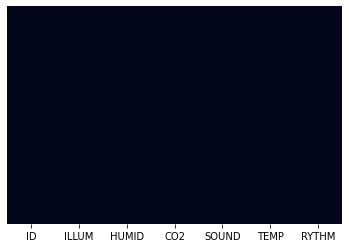

In [ ]:
sns.heatmap(entrada.isnull(),yticklabels=False,cbar=False)

In [ ]:
X = dataset.drop(['RYTHM'], axis=1)
y = dataset['RYTHM'].ravel()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


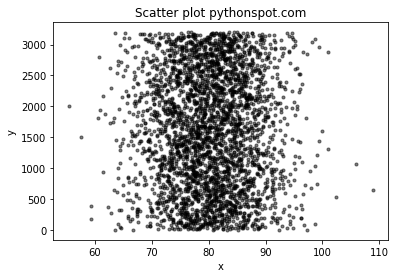

In [ ]:
# Scatter Plot
area = np.pi*3
colors = (0,0,0)
plt.scatter(dataset.RYTHM, dataset.ID, s=area, c=colors, alpha=0.5)
plt.title('Scatter plot pythonspot.com')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

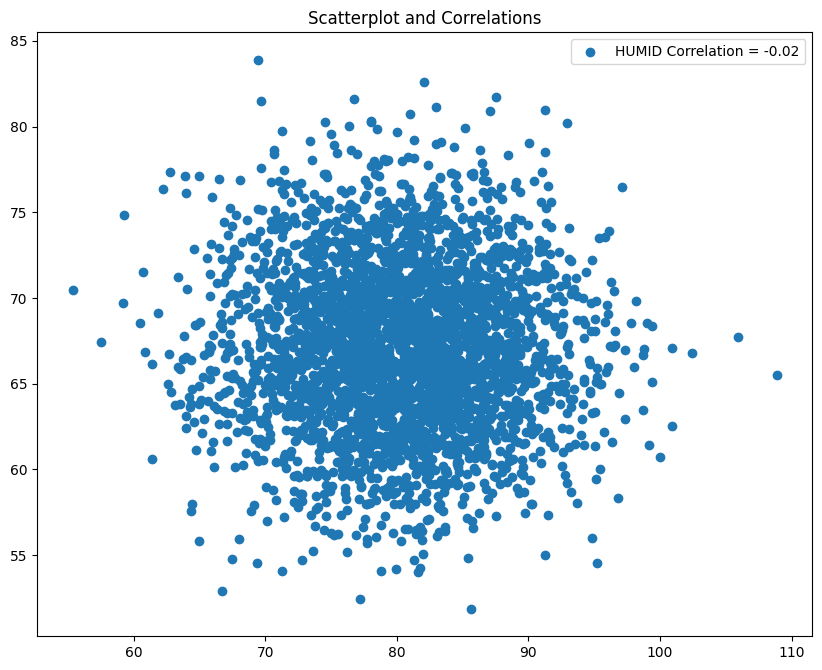

In [ ]:
# Plot
plt.rcParams.update({'figure.figsize':(10,8), 'figure.dpi':100})
# plt.scatter(dataset.RYTHM, dataset.ID, label=f'ID Correlation = {np.round(np.corrcoef(dataset.RYTHM, dataset.ID)[0,1], 2)}')
# plt.scatter(dataset.RYTHM, dataset.SOUND, label=f'SOUND Correlation = {np.round(np.corrcoef(dataset.RYTHM, dataset.SOUND)[0,1], 2)}')
plt.scatter(dataset.RYTHM, dataset.HUMID, label=f'HUMID Correlation = {np.round(np.corrcoef(dataset.RYTHM, dataset.HUMID)[0,1], 2)}')
# plt.scatter(dataset.RYTHM, dataset.TEMP, label=f'TEMP Correlation = {np.round(np.corrcoef(dataset.RYTHM, dataset.TEMP)[0,1], 2)}')
# plt.scatter(dataset.RYTHM, dataset.CO2, label=f'CO2 Correlation = {np.round(np.corrcoef(dataset.RYTHM, dataset.CO2)[0,1], 2)}')
# plt.scatter(dataset.RYTHM, dataset.ILLUM, label=f'ILLUM Correlation = {np.round(np.corrcoef(dataset.RYTHM, dataset.ILLUM)[0,1], 2)}')

# Plot
plt.title('Scatterplot and Correlations')
plt.legend()
plt.show()

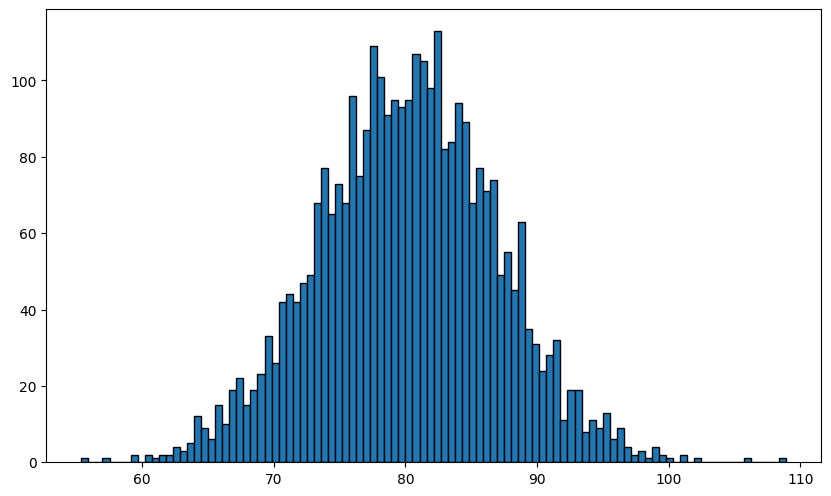

In [ ]:
area = np.pi*3
colors = (0,0,0)
plt.figure(figsize=(10,6))
plt.hist(dataset.RYTHM, bins=100, ec='black')
plt.show()

### Submissao

Cloud Functions - https://us-south.functions.appdomain.cloud/api/v1/web/igor.franco%40md2net.com.br_dev/default/Recebedados-desafio2

import sys


def main(dict):
    ROOM = dict.get("room","Ambiente nao cadastrado")
    CO2 = dict["values"].get("co2","Dado nao cadastrado")
    TEMPERATURA = dict["values"].get("temperature","Dado nao cadastrado")
    HUMIDADE = dict["values"].get("humidity","Dado nao cadastrado")
    SOM = dict["values"].get("sound","Dado nao cadastrado")
    ILUMINACAO = dict["values"].get("illumination","Dado nao cadastrado")

    ambientes = ["activity-room","refectory","room-1","bathroom-main","garden"]
    dados = ["co2", "temperature","humidity","sound","illumination"]
    saida = []
    

    if ROOM in ambientes:    
        # Limites do activity-room
        if ROOM == ambientes[0]:
            if CO2 > 500:
                saida.append("co2")
            if TEMPERATURA < 19 or TEMPERATURA > 22:
                saida.append("temperature")
            if HUMIDADE < 50 or HUMIDADE > 60:
                saida.append("humidity")
            if SOM < 0 or SOM > 40:
                saida.append("sound")
            if ILUMINACAO < 300 or ILUMINACAO > 750:
                saida.append("illumination")
        
        # Limites do refectory
        if ROOM == ambientes[1]:
            if CO2 > 400:
                saida.append("co2")
            if TEMPERATURA < 20 or TEMPERATURA > 23:
                saida.append("temperature")
            if HUMIDADE < 50 or HUMIDADE > 70:
                saida.append("humidity")
            if SOM < 20 or SOM > 35:
                saida.append("sound")
            if ILUMINACAO < 200 or ILUMINACAO > 500:
                saida.append("illumination")
        
        # Limites do room-1
        if ROOM == ambientes[2]:
            if CO2 > 300:
                saida.append("co2")
            if TEMPERATURA < 21 or TEMPERATURA > 23:
                saida.append("temperature")
            if HUMIDADE < 50 or HUMIDADE > 60:
                saida.append("humidity")
            if SOM < 10 or SOM > 30:
                saida.append("sound")
            if ILUMINACAO < 100 or ILUMINACAO > 200:
                saida.append("illumination")
                
        # Limites do bathroom-main
        if ROOM == ambientes[3]:
            if CO2 > 500:
                saida.append("co2")
            if TEMPERATURA < 22 or TEMPERATURA > 25:
                saida.append("temperature")
            if HUMIDADE < 60 or HUMIDADE > 75:
                saida.append("humidity")
            if SOM < 20 or SOM > 35:
                saida.append("sound")
            if ILUMINACAO < 100 or ILUMINACAO > 200:
                saida.append("illumination")
                
        # Limites do garden
        if ROOM == ambientes[4]:
            if CO2 > 500:
                saida.append("co2")
            if TEMPERATURA < 15 or TEMPERATURA > 22:
                saida.append("temperature")
            if HUMIDADE < 50 or HUMIDADE > 80:
                saida.append("humidity")
            if SOM < 10 or SOM > 35:
                saida.append("sound")
    else:
        room = "Ambiente nao cadastrado"
            
    return { 'alerts': saida }


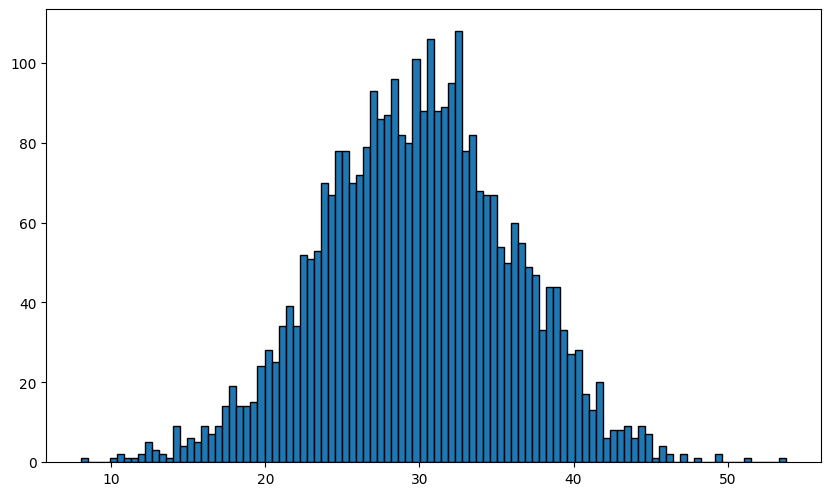

In [ ]:
area = np.pi*3
colors = (0,0,0)
plt.figure(figsize=(10,6))
plt.hist(dataset.SOUND, bins=100, ec='black')
plt.show()

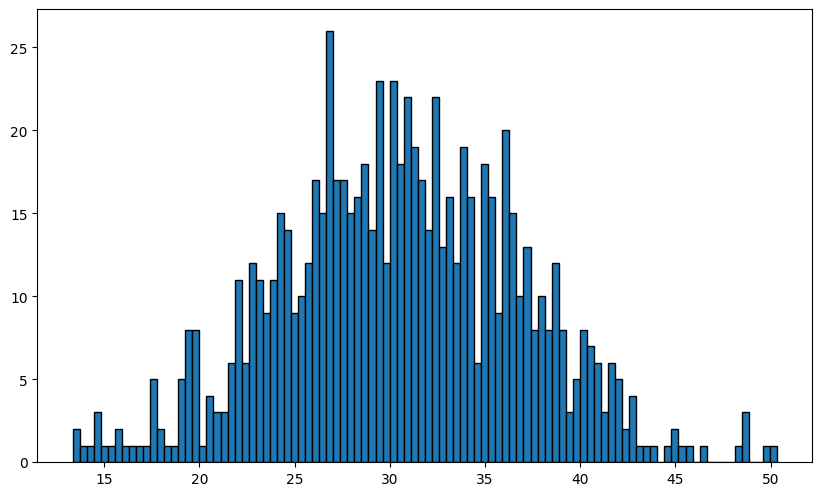

In [ ]:
area = np.pi*3
colors = (0,0,0)
plt.figure(figsize=(10,6))
plt.hist(answers.SOUND, bins=100, ec='black')
plt.show()

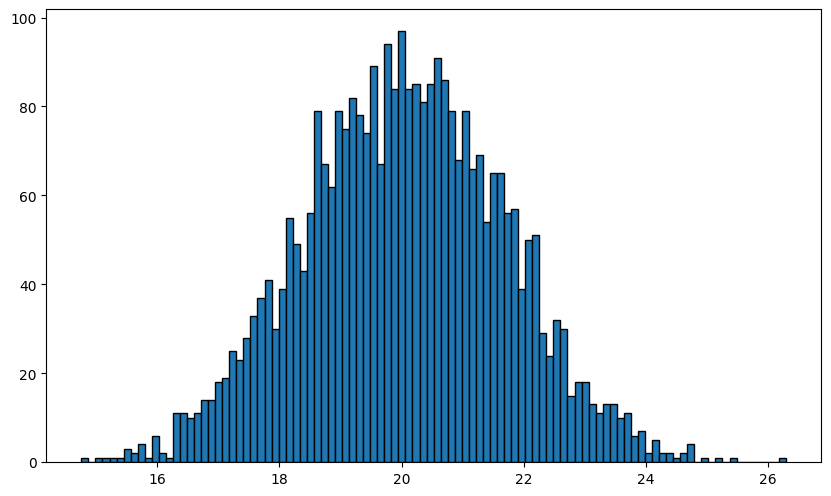

In [ ]:
area = np.pi*3
colors = (0,0,0)
plt.figure(figsize=(10,6))
plt.hist(dataset.TEMP, bins=100, ec='black')
plt.show()

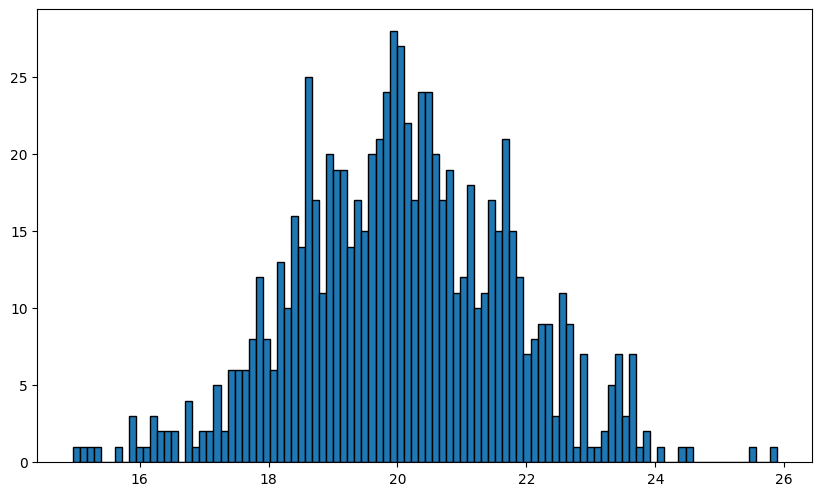

In [ ]:
area = np.pi*3
colors = (0,0,0)
plt.figure(figsize=(10,6))
plt.hist(answers.TEMP, bins=100, ec='black')
plt.show()

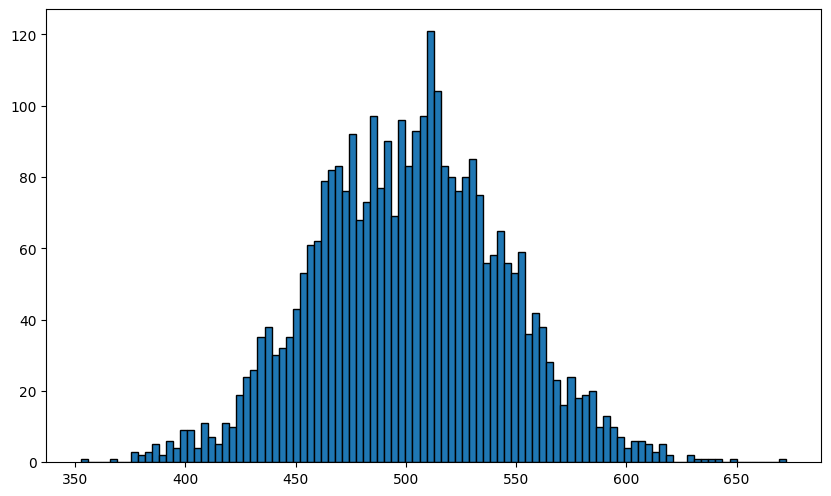

In [ ]:
area = np.pi*3
colors = (0,0,0)
plt.figure(figsize=(10,6))
plt.hist(dataset.CO2, bins=100, ec='black')
plt.show()

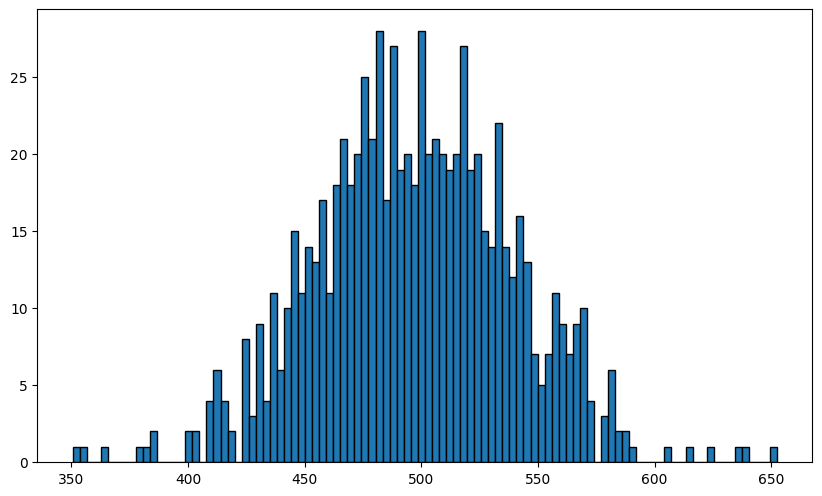

In [ ]:
area = np.pi*3
colors = (0,0,0)
plt.figure(figsize=(10,6))
plt.hist(answers.CO2, bins=100, ec='black')
plt.show()

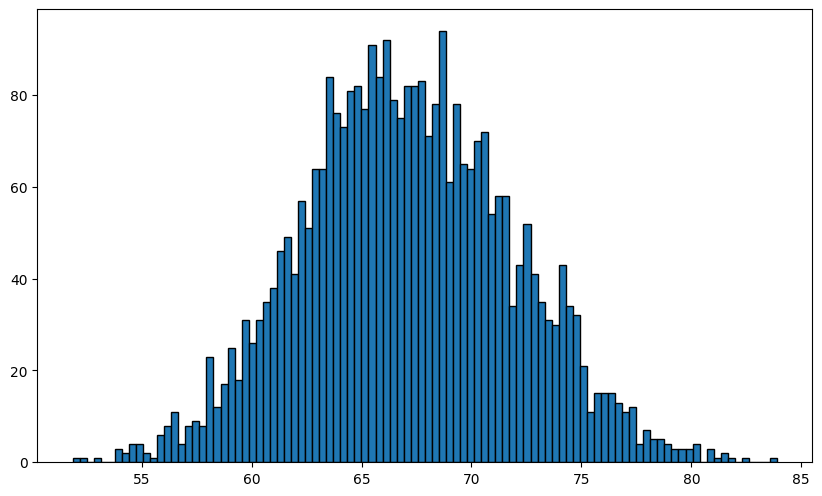

In [ ]:
area = np.pi*3
colors = (0,0,0)
plt.figure(figsize=(10,6))
plt.hist(dataset.HUMID, bins=100, ec='black')
plt.show()

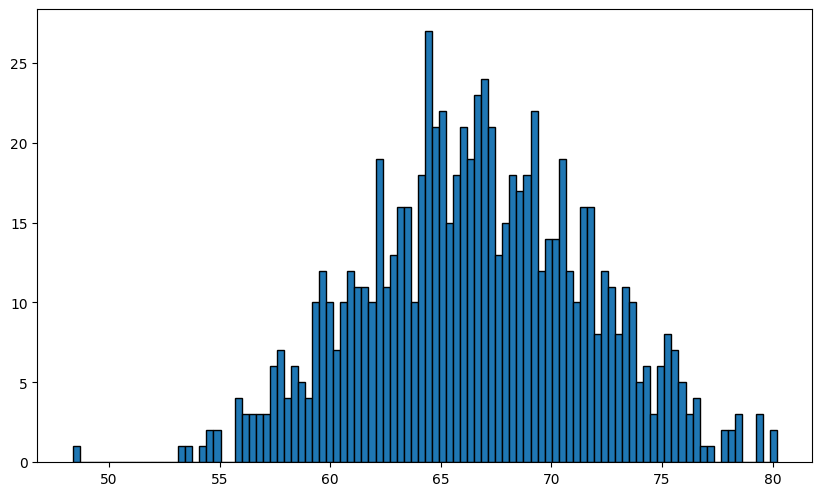

In [ ]:
area = np.pi*3
colors = (0,0,0)
plt.figure(figsize=(10,6))
plt.hist(answers.HUMID, bins=100, ec='black')
plt.show()

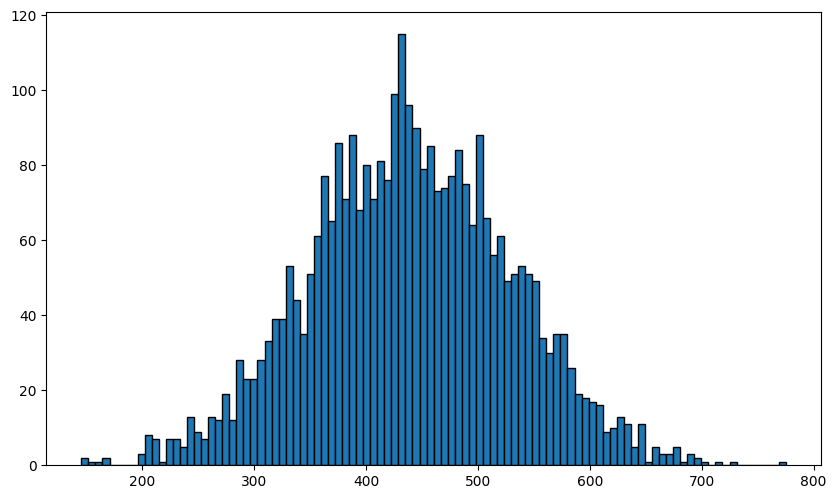

In [ ]:
area = np.pi*3
colors = (0,0,0)
plt.figure(figsize=(10,6))
plt.hist(dataset.ILLUM, bins=100, ec='black')
plt.show()

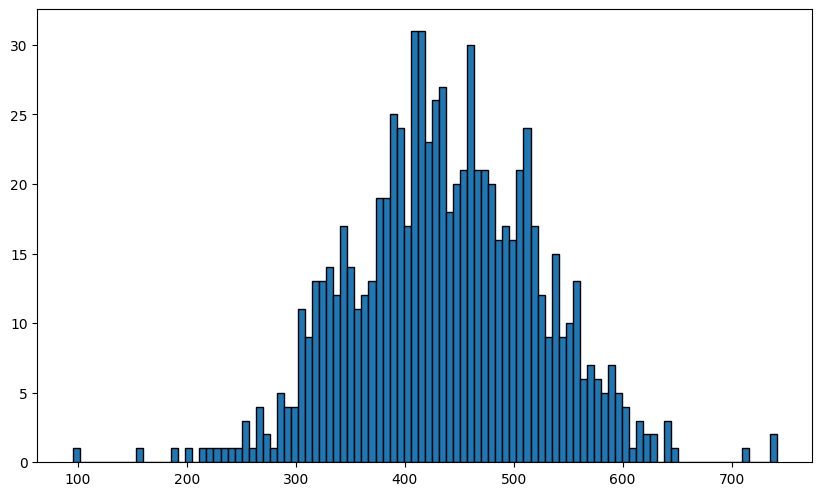

In [ ]:
area = np.pi*3
colors = (0,0,0)
plt.figure(figsize=(10,6))
plt.hist(answers.ILLUM, bins=100, ec='black')
plt.show()

<AxesSubplot:>

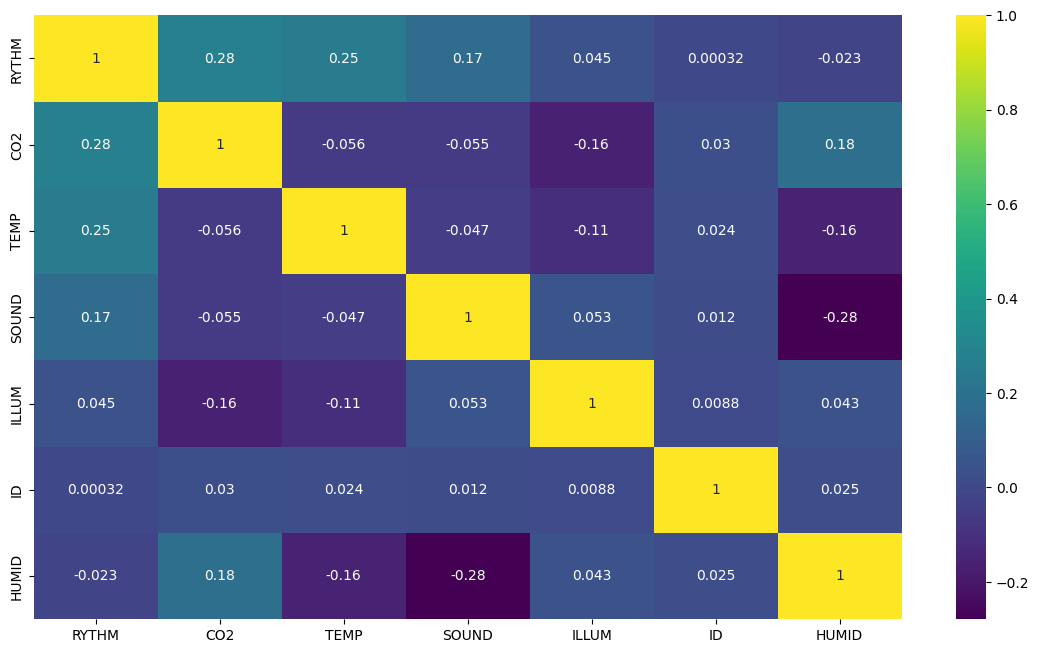

In [ ]:
k = 19
cols = dataset.corr().nlargest(k, 'RYTHM')['RYTHM'].index
cm = dataset[cols].corr()
plt.figure(figsize=(14,8))
sns.heatmap(cm, annot=True, cmap='viridis')

### 4.1 - Submissao - Cloud Functions

Cloud Functions - https://us-south.functions.appdomain.cloud/api/v1/web/igor.franco%40md2net.com.br_dev/default/Recebedados-desafio2

import sys


def main(dict):
    ROOM = dict.get("room","Ambiente nao cadastrado")
    CO2 = dict["values"].get("co2","Dado nao cadastrado")
    TEMPERATURA = dict["values"].get("temperature","Dado nao cadastrado")
    HUMIDADE = dict["values"].get("humidity","Dado nao cadastrado")
    SOM = dict["values"].get("sound","Dado nao cadastrado")
    ILUMINACAO = dict["values"].get("illumination","Dado nao cadastrado")

    ambientes = ["activity-room","refectory","room-1","bathroom-main","garden"]
    dados = ["co2", "temperature","humidity","sound","illumination"]
    saida = []
    

    if ROOM in ambientes:    
        # Limites do activity-room
        if ROOM == ambientes[0]:
            if CO2 > 500:
                saida.append("co2")
            if TEMPERATURA < 19 or TEMPERATURA > 22:
                saida.append("temperature")
            if HUMIDADE < 50 or HUMIDADE > 60:
                saida.append("humidity")
            if SOM < 0 or SOM > 40:
                saida.append("sound")
            if ILUMINACAO < 300 or ILUMINACAO > 750:
                saida.append("illumination")
        
        # Limites do refectory
        if ROOM == ambientes[1]:
            if CO2 > 400:
                saida.append("co2")
            if TEMPERATURA < 20 or TEMPERATURA > 23:
                saida.append("temperature")
            if HUMIDADE < 50 or HUMIDADE > 70:
                saida.append("humidity")
            if SOM < 20 or SOM > 35:
                saida.append("sound")
            if ILUMINACAO < 200 or ILUMINACAO > 500:
                saida.append("illumination")
        
        # Limites do room-1
        if ROOM == ambientes[2]:
            if CO2 > 300:
                saida.append("co2")
            if TEMPERATURA < 21 or TEMPERATURA > 23:
                saida.append("temperature")
            if HUMIDADE < 50 or HUMIDADE > 60:
                saida.append("humidity")
            if SOM < 10 or SOM > 30:
                saida.append("sound")
            if ILUMINACAO < 100 or ILUMINACAO > 200:
                saida.append("illumination")
                
        # Limites do bathroom-main
        if ROOM == ambientes[3]:
            if CO2 > 500:
                saida.append("co2")
            if TEMPERATURA < 22 or TEMPERATURA > 25:
                saida.append("temperature")
            if HUMIDADE < 60 or HUMIDADE > 75:
                saida.append("humidity")
            if SOM < 20 or SOM > 35:
                saida.append("sound")
            if ILUMINACAO < 100 or ILUMINACAO > 200:
                saida.append("illumination")
                
        # Limites do garden
        if ROOM == ambientes[4]:
            if CO2 > 500:
                saida.append("co2")
            if TEMPERATURA < 15 or TEMPERATURA > 22:
                saida.append("temperature")
            if HUMIDADE < 50 or HUMIDADE > 80:
                saida.append("humidity")
            if SOM < 10 or SOM > 35:
                saida.append("sound")
    else:
        room = "Ambiente nao cadastrado"
            
    return { 'alerts': saida }


### 4.2 - Submissao SVR

In [ ]:
X = dataset.drop(['RYTHM','ID','HUMID'], axis=1)
y = dataset['RYTHM'].values.reshape(-1,1)
test_size = 0.30
seed = 7
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y.ravel(), test_size=test_size, random_state=seed)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2240, 4), (960, 4), (2240,), (960,))

In [ ]:
regressor = SVR(kernel='linear', gamma=1, C=1)
regressor.fit(X_train, y_train)

SVR(C=1, gamma=1, kernel='linear')

In [ ]:
y_pred = regressor.predict(X_test)
a = np.round(sc_y.inverse_transform(y_test.reshape(-1,1)),2).tolist()
b = np.round(sc_y.inverse_transform(y_pred.reshape(-1,1)),2).tolist()

print('Variance Score (R2): {:.2f}'.format(metrics.r2_score(y_test, y_pred)*100))
print('Variance Score (R2): {:.2f}'.format(metrics.r2_score(a, b)*100))
mlr_diff = pd.DataFrame({'Actual value': a, 'Predicted value': b})
mlr_diff.head()

Variance Score (R2): 20.78
Variance Score (R2): 20.78


,Actual value,Predicted value
0,[76.27],[77.93]
1,[90.38],[83.06]
2,[82.25],[78.29]
3,[84.13],[77.26]
4,[72.76],[78.62]


In [ ]:
X1 = answers.drop(['RYTHM','ID','HUMID'], axis=1)
y1 = answers['RYTHM'].values.reshape(-1,1)

sc_X1 = StandardScaler()
sc_y1 = StandardScaler()
X1 = sc_X1.fit_transform(X1)
y1 = sc_y1.fit_transform(y1)

In [ ]:
regressor.fit(X, y.ravel())

SVR(C=1, gamma=1, kernel='linear')

In [ ]:
y_saida = regressor.predict(X1)
y_saida.shape, X1.shape

((800,), (800, 4))

In [ ]:
# y2 = sc_y.inverse_transform(y_saida.reshape(-1,1))
y2 = np.round(sc_y.inverse_transform(y_saida.reshape(-1,1)),2)

In [ ]:
y2

array([[76.79],
       [80.56],
       [80.61],
       [83.32],
       [83.87],
       [86.87],
       [80.74],
       [81.3 ],
       [81.26],
       [78.13],
       [84.04],
       [77.48],
       [78.57],
       [80.6 ],
       [82.08],
       [75.8 ],
       [78.1 ],
       [74.13],
       [84.92],
       [81.  ],
       [80.34],
       [76.38],
       [76.74],
       [79.46],
       [84.14],
       [73.83],
       [80.89],
       [78.85],
       [80.82],
       [75.04],
       [80.28],
       [80.91],
       [82.12],
       [80.23],
       [80.22],
       [78.19],
       [80.49],
       [81.17],
       [73.27],
       [78.86],
       [79.43],
       [79.86],
       [82.64],
       [78.1 ],
       [77.1 ],
       [78.84],
       [81.52],
       [76.94],
       [85.15],
       [81.2 ],
       [79.89],
       [80.97],
       [81.7 ],
       [77.57],
       [82.38],
       [79.33],
       [76.13],
       [81.79],
       [81.48],
       [78.83],
       [82.14],
       [84.54],
       [

In [ ]:
final = answers.copy()

In [ ]:
final

,ID,ILLUM,HUMID,CO2,SOUND,TEMP,RYTHM
0,0,337.90,63.29,518.13,22.38,18.59,0.0
1,1,342.96,63.19,488.85,37.36,20.41,0.0
2,2,369.86,57.39,516.86,26.45,20.89,0.0
3,3,304.65,67.80,517.50,32.98,22.52,0.0
4,4,442.25,68.21,500.91,37.28,21.88,0.0
...,...,...,...,...,...,...,...
795,795,421.39,55.97,451.86,29.25,18.96,0.0
796,796,572.90,59.42,502.12,36.12,19.70,0.0
797,797,460.78,64.28,560.54,31.20,15.11,0.0
798,798,499.75,67.20,536.88,30.68,17.57,0.0


In [ ]:
type(y2)

numpy.ndarray

In [ ]:
final['RYTHM'] = y2

In [ ]:
final

,ID,ILLUM,HUMID,CO2,SOUND,TEMP,RYTHM
0,0,337.90,63.29,518.13,22.38,18.59,76.79
1,1,342.96,63.19,488.85,37.36,20.41,80.56
2,2,369.86,57.39,516.86,26.45,20.89,80.61
3,3,304.65,67.80,517.50,32.98,22.52,83.32
4,4,442.25,68.21,500.91,37.28,21.88,83.87
...,...,...,...,...,...,...,...
795,795,421.39,55.97,451.86,29.25,18.96,75.98
796,796,572.90,59.42,502.12,36.12,19.70,82.33
797,797,460.78,64.28,560.54,31.20,15.11,77.81
798,798,499.75,67.20,536.88,30.68,17.57,79.78


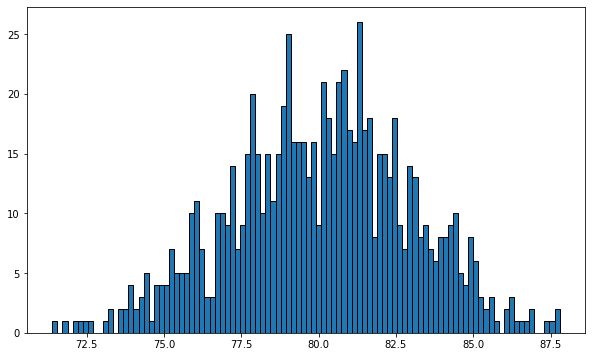

In [ ]:
area = np.pi*3
colors = (0,0,0)
plt.figure(figsize=(10,6))
plt.hist(final.RYTHM, bins=100, ec='black')
plt.show()

In [ ]:

final.to_csv('..\ANSWERS-final.csv', index=False)